这篇博客记录利用 matplotlib 进行科研绘图的一列案例，部分案例来自于这篇[博客](https://randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/)。


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import math

In [2]:
data = load_iris()
sepal_length = data["data"][:, 0]
sepal_width = data["data"][:, 1]

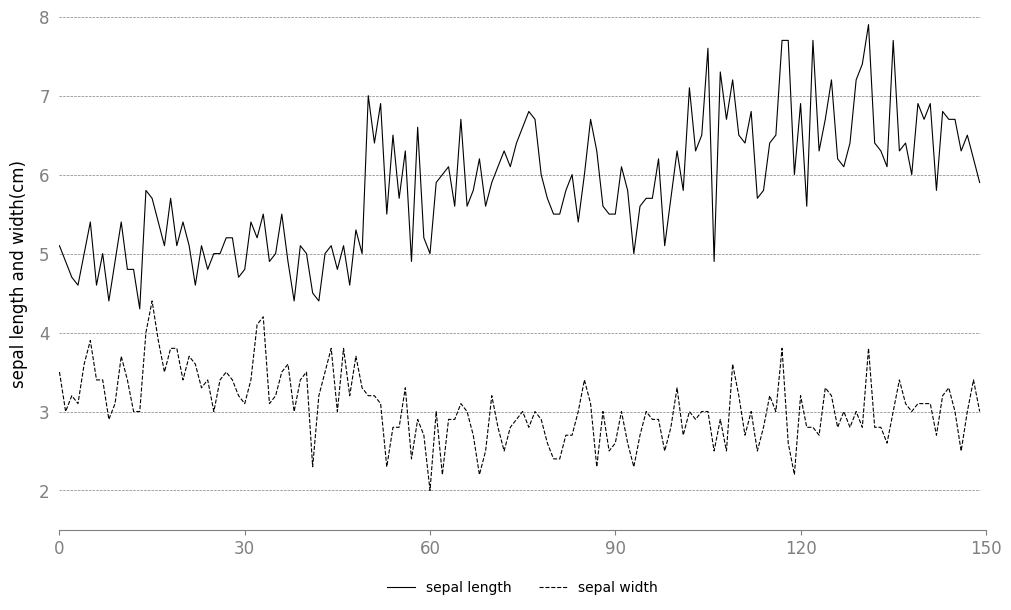

In [3]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100, layout="constrained")

# 设置是否显示图像边框
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["bottom"].set_color("grey")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.tick_params(
    axis="both",
    which="both",
    bottom=True,  # 显示底部刻度线
    top=False,
    labelbottom=True,
    left=False,  # 不显示左侧刻度线
    right=False,
    labelleft=True,
    color="grey",
    labelcolor="grey",
)

# 设置 x y 轴刻度范围，避免不必要的空白
ax.set_ylim([sepal_width.min() - 0.5, math.ceil(sepal_length.max())])
ax.set_xlim([0, 150])

# 设置 x y 轴刻度和刻度标签
# 根据原始数据范围，设置刻度时灵活使用 int 向下取整和 math.ceil 向上取整
ax.set_yticks(
    range(int(sepal_width.min()), math.ceil(sepal_length.max()) + 1, 1),
    [
        str(x)
        for x in range(int(sepal_width.min()), math.ceil(sepal_length.max()) + 1, 1)
    ],
    fontsize=12,
)
ax.set_xticks(range(0, 151, 30), [str(x) for x in range(0, 151, 30)], fontsize=12)

# 在图上提供刻度线
# 以帮助观众沿着坐标轴刻度进行追踪
# 可以设置为虚线和浅色，以免遮挡主要的数据线
# 刻度线设置注意与 y 轴刻度一致
for y in range(int(sepal_width.min()), math.ceil(sepal_length.max()) + 1, 1):
    ax.plot(
        range(len(sepal_length)), [y] * len(sepal_length), "--", lw=0.5, color="grey"
    )


ax.plot(
    range(len(sepal_length)),
    sepal_length,
    color="black",
    linestyle="-",
    linewidth=0.8,
    label="sepal length",
)
ax.plot(
    range(len(sepal_width)),
    sepal_width,
    color="black",
    linestyle="--",
    linewidth=0.8,
    label="sepal width",
)
# ax.set_xlabel("xlabel", fontsize=12)
# 使用 labelpad 灵活设置 y 轴标签与 y 轴距离
ax.set_ylabel("sepal length and width(cm)", fontsize=12, labelpad=8)

# 使用 bbox_to_anchor 和 loc 定位图例位置
# nloc 设置行列数；frameon 设置边框显示
ax.legend(bbox_to_anchor=(0.5, -0.15), loc="lower center", ncol=2, frameon=False)

plt.show()

In [4]:
gender_degree_data = pd.read_csv(
    "http://www.randalolson.com/assets/2014/06/percent-bachelors-degrees-women-usa.csv"
)

In [5]:
tableau20 = [
    (31, 119, 180),
    (174, 199, 232),
    (255, 127, 14),
    (255, 187, 120),
    (44, 160, 44),
    (152, 223, 138),
    (214, 39, 40),
    (255, 152, 150),
    (148, 103, 189),
    (197, 176, 213),
    (140, 86, 75),
    (196, 156, 148),
    (227, 119, 194),
    (247, 182, 210),
    (127, 127, 127),
    (199, 199, 199),
    (188, 189, 34),
    (219, 219, 141),
    (23, 190, 207),
    (158, 218, 229),
]

# 将RGB值缩放到[0, 1]的范围内
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255.0, g / 255.0, b / 255.0)

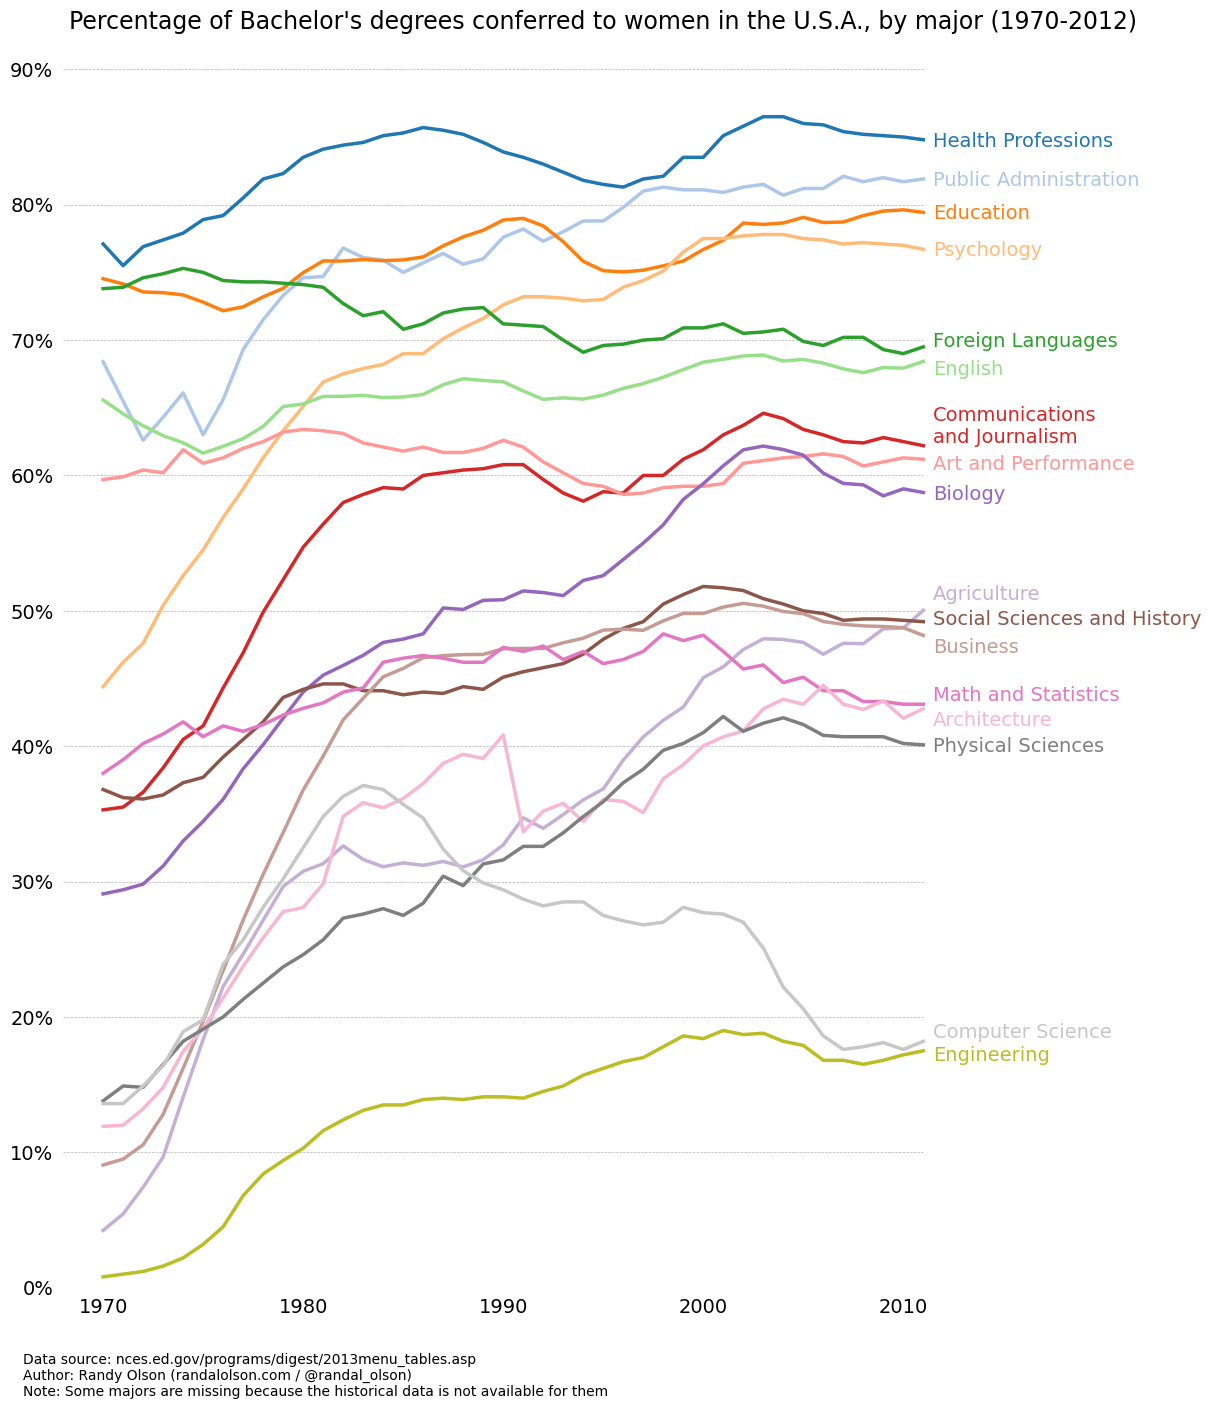

In [6]:
fig, ax = plt.subplots(figsize=(12, 14), layout="constrained")

# 去除图像的边框
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# 保证 x 轴刻度处于底部
# 保证 y 轴刻度处于左侧
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# 设置 x y 轴刻度范围，避免不必要的空白
ax.set_ylim([0, 90])
ax.set_xlim([1968, 2014])

# 设置 x y 轴刻度和刻度标签
ax.set_yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)
ax.set_xticks(
    range(1970, 2011, 10), [str(x) for x in range(1970, 2011, 10)], fontsize=14
)

# 在图上提供刻度线
# 以帮助观众沿着坐标轴刻度进行追踪
# 可以设置为虚线和浅色，以免遮挡主要的数据线
for y in range(10, 91, 10):
    ax.plot(
        range(1968, 2012),
        [y] * len(range(1968, 2012)),
        "--",
        lw=0.5,
        color="black",
        alpha=0.3,
    )

# 去除 x y 轴刻度上的刻度指示线
plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    labelbottom=True,
    left=False,
    right=False,
    labelleft=True,
)

majors = [
    "Health Professions",
    "Public Administration",
    "Education",
    "Psychology",
    "Foreign Languages",
    "English",
    "Communications\nand Journalism",
    "Art and Performance",
    "Biology",
    "Agriculture",
    "Social Sciences and History",
    "Business",
    "Math and Statistics",
    "Architecture",
    "Physical Sciences",
    "Computer Science",
    "Engineering",
]

# 使用 text() 方法精确添加图例
for rank, column in enumerate(majors):
    # Plot each line separately with its own color, using the Tableau 20
    # color set in order.
    ax.plot(
        gender_degree_data.Year.values,
        gender_degree_data[column.replace("\n", " ")].values,
        lw=2.5,
        color=tableau20[rank],
    )

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5
    if column == "Foreign Languages":
        y_pos += 0.5
    elif column == "English":
        y_pos -= 0.5
    elif column == "Communications\nand Journalism":
        y_pos += 0.75
    elif column == "Art and Performance":
        y_pos -= 0.25
    elif column == "Agriculture":
        y_pos += 1.25
    elif column == "Social Sciences and History":
        y_pos += 0.25
    elif column == "Business":
        y_pos -= 0.75
    elif column == "Math and Statistics":
        y_pos += 0.75
    elif column == "Architecture":
        y_pos -= 0.75
    elif column == "Computer Science":
        y_pos += 0.75
    elif column == "Engineering":
        y_pos -= 0.25

    ax.text(2011.5, y_pos, column, fontsize=14, color=tableau20[rank])

# title() 方法会将标题居中显示在图上，但并不会居中于整个图形
# 因此使用 text() 方法显示标题
ax.text(
    1995,
    93,
    "Percentage of Bachelor's degrees conferred to women in the U.S.A."
    ", by major (1970-2012)",
    fontsize=17,
    ha="center",
)

# 标示数据来源和 copyright
ax.text(
    1966,
    -8,
    "Data source: nces.ed.gov/programs/digest/2013menu_tables.asp"
    "\nAuthor: Randy Olson (randalolson.com / @randal_olson)"
    "\nNote: Some majors are missing because the historical data "
    "is not available for them",
    fontsize=10,
)

# bbox_inches='tight' 去除图像边缘的多余空白
# plt.savefig("percent-bachelors-degrees-women-usa.png", bbox_inches="tight")
plt.show()